$$\textrm{Joaquin Peñuela Parra}$$
$$\textrm{Universidad de los Andes}$$
$$\textrm{Grupo de Física de Altas Energías: Fenomenología de Partículas}$$

$\textbf{Preliminares}$ 

Las librerías que se usan aquí son las siguientes: 

In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "serif"

Definamos las rutas que necesitamos para leer los archivos cutflows

In [2]:
Path_delphes_preselection = os.path.dirname(os.path.realpath('Composition_Charts_JP.ipynb'))
Path_Leptoquarks_searches = os.path.dirname(Path_delphes_preselection)
Path_Selected_Events = f'{Path_delphes_preselection}/Selected_Events' #Carpeta donde están los csv preseleccionados
Path_Tablas_XS = f'{Path_Leptoquarks_searches}/02_parton_analysis/XS_Matrixes'

In [3]:
channels = ['hadronic', 'semileptonic']
processes = ['b_b_tau_tau', 'b_tau_tau']
signals = ['LQ_LQ','Tau_LQ']

Construyamos una tabla con la composición, con el objetivo de analizar su mapa de calor, para esto es util definir la siguiente función que permite extraer la eficiencia de la señal, proceso y canal que deseemos:

In [4]:
def Eficiencia(process, channel, signal):
    
    path_csv = f'{Path_Selected_Events}/Cutflow_{process}_{channel}.csv'
    cutflow = pd.read_csv(path_csv)
    
    return cutflow[signal][cutflow.shape[0]-2] #Así se extrae el valor de la penultima fila, esa es la eficiencia

In [5]:
datas = ['Data_5K_13_TeV']
betards = {'Betard33_minus1': '', 'Betard33_0': '_wo_RHC'}

In [6]:
Tablas_XS = {}
for betard in betards:
    Tablas_XS[betard] = {}
    for data in datas:
        for signal in signals:
            ruta = f'{data}_{signal}'
            Tablas_XS[betard][ruta] = pd.read_excel(f'{Path_Tablas_XS}/{betard}/{ruta}.xlsx', index_col = 0)
            Tablas_XS[betard][ruta].columns = [float(colum)/1000 for colum in Tablas_XS[betard][ruta].columns]
            Tablas_XS[betard][ruta].index = [float(fila) for fila in Tablas_XS[betard][ruta].index]
        #Tablas_XS[ruta].sort_index(level=0, ascending=False, inplace=True)

In [7]:
Tablas_XS['Betard33_minus1']['Data_5K_13_TeV_LQ_LQ']

,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50
0.25,934.1,19.89,1.523,0.1972,0.03312,0.006546,0.001417,0.000329,0.000080,0.000020
0.50,930.1,19.96,1.523,0.1974,0.03321,0.006507,0.001409,0.000327,0.000080,0.000020
1.00,930.6,19.97,1.531,0.1976,0.03330,0.006500,0.001417,0.000330,0.000079,0.000020
1.50,934.1,19.95,1.533,0.1973,0.03319,0.006544,0.001423,0.000330,0.000080,0.000020
2.00,947.1,20.28,1.548,0.2015,0.03384,0.006642,0.001442,0.000335,0.000081,0.000020
2.50,967.5,20.95,1.616,0.2085,0.03485,0.006838,0.001479,0.000344,0.000082,0.000020
3.00,1023.0,22.21,1.721,0.2215,0.03692,0.007156,0.001554,0.000357,0.000085,0.000021


In [8]:
Tablas_XS['Betard33_0']['Data_5K_13_TeV_LQ_LQ']

,0.25,0.50,0.75,1.00,1.25,1.50,1.75,2.00,2.25,2.50
0.25,931.5,19.90,1.526,0.1967,0.03335,0.006535,0.001423,0.000328,0.000079,0.00002
0.50,933.2,19.94,1.525,0.1977,0.03335,0.006554,0.001410,0.000329,0.000080,0.00002
1.00,930.8,19.99,1.525,0.1967,0.03323,0.006514,0.001409,0.000330,0.000080,0.00002
1.50,930.6,19.94,1.529,0.1971,0.03349,0.006551,0.001419,0.000330,0.000079,0.00002
2.00,938.3,20.11,1.536,0.1991,0.03375,0.006567,0.001428,0.000332,0.000080,0.00002
2.50,954.4,20.41,1.570,0.2023,0.03411,0.006655,0.001450,0.000335,0.000081,0.00002
3.00,977.4,21.15,1.618,0.2094,0.03497,0.006849,0.001485,0.000345,0.000082,0.00002


Ya podemos acceder a todas las tablas de XS, ahora si podemos crear tablas de composición de SLQ siguiendo la misma estructura:

In [9]:
Compositions = {}

In [10]:
Masses = ['1000', '1250', '1500', '1750', '2000', '2250', '2500']
g_Us = ['0.25', '0.5', '1', '1.5', '2.0', '2.5', '3.0']

In [11]:
for betard in betards:
    Compositions[betard] = {}
    for process in processes:
        for channel in channels:
            for data in datas:

                Compositions[betard][f'{process}_{channel}'] = np.zeros([len(g_Us), len(Masses)])

                for i in range(len(g_Us)):
                    for j in range(len(Masses)):
                        g_U = float(g_Us[i])
                        M = float(Masses[j])/1000

                        Eficiencia_M_LQ_LQ = Eficiencia(process, channel, f'LQ_LQ_{Masses[j]}{betards[betard]}')
                        XS_LQ_LQ = Tablas_XS[betard][f'{data}_LQ_LQ'][M][g_U]

                        Eficiencia_M_Tau_LQ = Eficiencia(process, channel, f'Tau_LQ_{Masses[j]}{betards[betard]}')
                        XS_Tau_LQ = Tablas_XS[betard][f'{data}_Tau_LQ'][M][g_U]

                        Compositions[betard][f'{process}_{channel}'][i,j] = (XS_Tau_LQ * Eficiencia_M_Tau_LQ) / (XS_Tau_LQ * Eficiencia_M_Tau_LQ + XS_LQ_LQ * Eficiencia_M_LQ_LQ)

                Compositions[betard][f'{process}_{channel}'] = pd.DataFrame(Compositions[betard][f'{process}_{channel}'])
                Compositions[betard][f'{process}_{channel}'].columns = [float(M) for M in Masses]
                Compositions[betard][f'{process}_{channel}'].index = [float(fila) for fila in g_Us]

                !mkdir -p {Path_delphes_preselection}/Composition_Charts
                !mkdir -p {Path_delphes_preselection}/Composition_Charts/{betard}
                Compositions[betard][f'{process}_{channel}'].to_excel(f'{Path_delphes_preselection}/Composition_Charts/{betard}/{process}_{channel}.xlsx')
                Compositions[betard][f'{process}_{channel}'].columns = [float(M)/1000 for M in Masses]


Ahora usemos las funciones de mi repositorio para analizar mapas de calor

In [12]:
!git clone https://github.com/Joacop16/Analisis_mapas_de_calor.git

Cloning into 'Analisis_mapas_de_calor'...
remote: Enumerating objects: 39, done.
remote: Counting objects: 100% (39/39), done.
remote: Compressing objects: 100% (29/29), done.
remote: Total 39 (delta 17), reused 24 (delta 9), pack-reused 0
Receiving objects: 100% (39/39), 2.67 MiB | 5.45 MiB/s, done.
Resolving deltas: 100% (17/17), done.


In [13]:
import sys
sys.path.append(f'{Path_delphes_preselection}/Analisis_mapas_de_calor')
import nbimporter
from Analisis_mapas_de_calor import Analisis_mapas_de_calor as mapas_de_calor

Betard -1

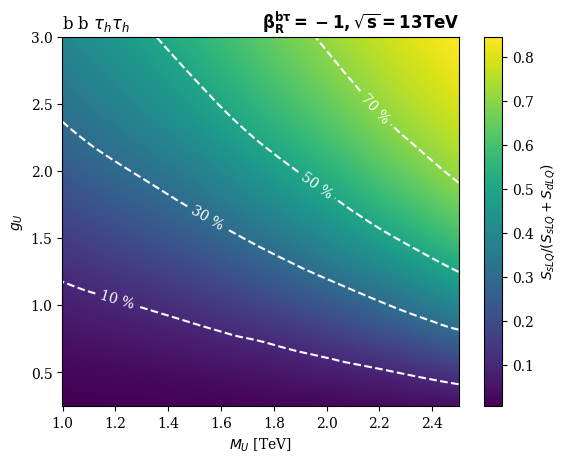

In [14]:
fig, ax = mapas_de_calor.heatmap(Data = mapas_de_calor.suavizar(Compositions['Betard33_minus1']['b_b_tau_tau_hadronic']),
                       curvas_de_nivel = {0.1: '10 %', 0.3: '30 %', 0.5: '50 %', 0.7: '70 %'},
                       curves_labels_locations = [(1.200,1), (1.500,1.5), (2.000,2), (2.200, 2.5)],
                       titulos = {'titulo': '', 'titulo_izquierda': r'b b $\tau_{h} \tau_{h}$', 'titulo_derecha': r'$\mathbf{\beta_{R}^{b \tau} = -1, \sqrt{s} = 13 TeV}$' ,'x_label': r'$M_{U}$ [TeV]', 'y_label': r'$g_U$', 'cbar_label': r'$S_{sLQ}/(S_{sLQ}+S_{dLQ})$'}
                    )
plt.savefig(f'{Path_delphes_preselection}/Composition_Charts/Betard33_minus1/comp_b_b_tau_tau_hadronic_wRHC.png', dpi = 300, bbox_inches='tight')

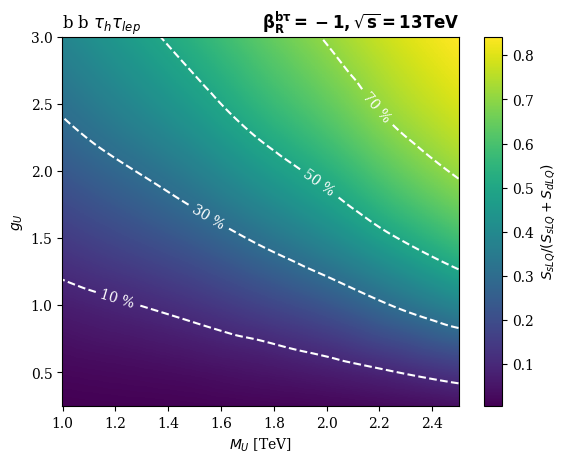

In [15]:
fig, ax = mapas_de_calor.heatmap(Data = mapas_de_calor.suavizar(Compositions['Betard33_minus1']['b_b_tau_tau_semileptonic']),
                       curvas_de_nivel = {0.1: '10 %', 0.3: '30 %', 0.5: '50 %', 0.7: '70 %'},
                       curves_labels_locations = [(1.200,1), (1.500,1.5), (2.000,2), (2.200, 2.5)],
                       titulos = {'titulo': '', 'titulo_izquierda': r'b b $\tau_{h} \tau_{lep}$', 'titulo_derecha': r'$\mathbf{\beta_{R}^{b \tau} = -1, \sqrt{s} = 13 TeV}$' ,'x_label': r'$M_{U}$ [TeV]', 'y_label': r'$g_U$', 'cbar_label': r'$S_{sLQ}/(S_{sLQ}+S_{dLQ})$'}
                    )
plt.savefig(f'{Path_delphes_preselection}/Composition_Charts/Betard33_minus1/comp_b_b_tau_tau_semileptonic_wRHC.png', dpi = 300, bbox_inches='tight')

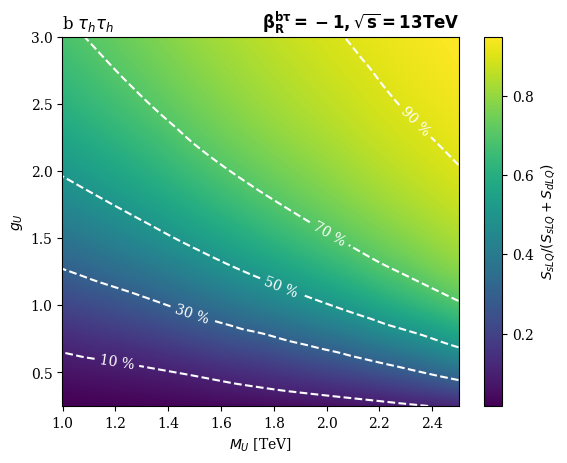

In [16]:
fig, ax = mapas_de_calor.heatmap(Data = mapas_de_calor.suavizar(Compositions['Betard33_minus1']['b_tau_tau_hadronic']),
                       curvas_de_nivel = {0.1: '10 %', 0.3: '30 %', 0.5: '50 %', 0.7: '70 %', 0.9: '90 %'},
                       curves_labels_locations= [(1.200,0.5), (1.500,1), (1.8,1), (2, 1.5), (2.4,2.5)],
                       titulos = {'titulo': '', 'titulo_izquierda': r'b $\tau_{h} \tau_{h}$', 'titulo_derecha': r'$\mathbf{\beta_{R}^{b \tau} = -1, \sqrt{s} = 13 TeV}$', 'x_label': r'$M_{U}$ [TeV]', 'y_label': r'$g_U$', 'cbar_label': r'$S_{sLQ}/(S_{sLQ}+S_{dLQ})$'}
                        )
plt.savefig(f'{Path_delphes_preselection}/Composition_Charts/Betard33_minus1/comp_b_tau_tau_hadronic_wRHC.png', dpi = 300, bbox_inches='tight')

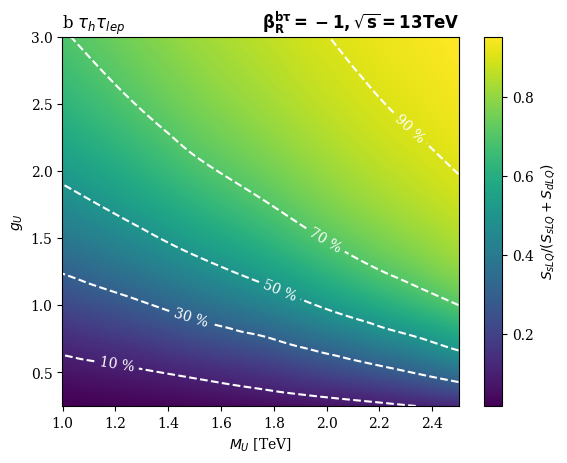

In [17]:
fig, ax = mapas_de_calor.heatmap(Data = mapas_de_calor.suavizar(Compositions['Betard33_minus1']['b_tau_tau_semileptonic']),
                       curvas_de_nivel = {0.1: '10 %', 0.3: '30 %', 0.5: '50 %', 0.7: '70 %', 0.9: '90 %'},
                       curves_labels_locations=[(1.200,0.5), (1.500,1), (1.8,1), (2, 1.5), (2.4,2.5)],
                       titulos = {'titulo': '', 'titulo_izquierda': r'b $\tau_{h} \tau_{lep}$', 'titulo_derecha': r'$\mathbf{\beta_{R}^{b \tau} = -1, \sqrt{s} = 13 TeV}$', 'x_label': r'$M_{U}$ [TeV]', 'y_label': r'$g_U$', 'cbar_label': r'$S_{sLQ}/(S_{sLQ}+S_{dLQ})$'}
                                )

plt.savefig(f'{Path_delphes_preselection}/Composition_Charts/Betard33_minus1/comp_b_tau_tau_semileptonic_wRHC.png', dpi = 300, bbox_inches='tight')

Betard 0

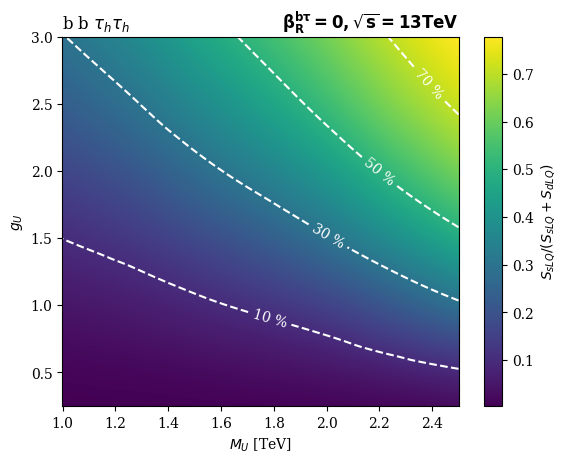

In [18]:
fig, ax = mapas_de_calor.heatmap(Data = mapas_de_calor.suavizar(Compositions['Betard33_0']['b_b_tau_tau_hadronic']),
                       curvas_de_nivel = {0.1: '10 %', 0.3: '30 %', 0.5: '50 %', 0.7: '70 %'},
                       curves_labels_locations= [(1.8,1), (2, 1.5), (2.2,2), (2.3,2.5)],
                       titulos = {'titulo': '', 'titulo_izquierda': r'b b $\tau_{h} \tau_{h}$', 'titulo_derecha': r'$\mathbf{\beta_{R}^{b \tau} = 0, \sqrt{s} = 13 TeV}$' ,'x_label': r'$M_{U}$ [TeV]', 'y_label': r'$g_U$', 'cbar_label': r'$S_{sLQ}/(S_{sLQ}+S_{dLQ})$'}
                                )

plt.savefig(f'{Path_delphes_preselection}/Composition_Charts/Betard33_0/comp_b_b_tau_tau_hadronic_woRHC.png', dpi = 300, bbox_inches='tight')

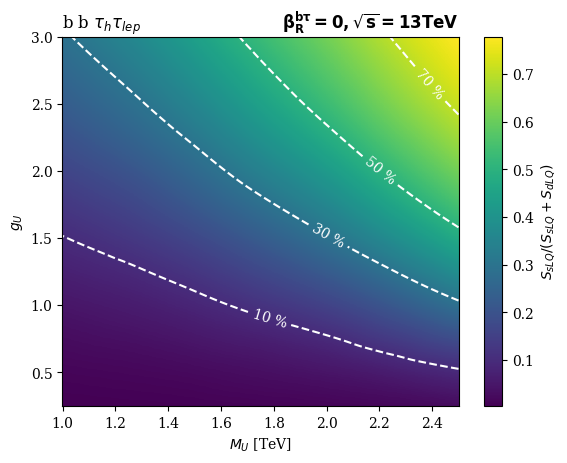

In [19]:
fig, ax = mapas_de_calor.heatmap(Data = mapas_de_calor.suavizar(Compositions['Betard33_0']['b_b_tau_tau_semileptonic']),
                       curvas_de_nivel = {0.1: '10 %', 0.3: '30 %', 0.5: '50 %', 0.7: '70 %'},
                       curves_labels_locations= [(1.8,1), (2, 1.5), (2.2,2), (2.3,2.5)],
                       titulos = {'titulo': '', 'titulo_izquierda': r'b b $\tau_{h} \tau_{lep}$', 'titulo_derecha': r'$\mathbf{ \beta_{R}^{b \tau} = 0, \sqrt{s} = 13 TeV}$' ,'x_label': r'$M_{U}$ [TeV]', 'y_label': r'$g_U$', 'cbar_label': r'$S_{sLQ}/(S_{sLQ}+S_{dLQ})$'}
                                )
plt.savefig(f'{Path_delphes_preselection}/Composition_Charts/Betard33_0/comp_b_b_tau_tau_semileptonic_woRHC.png', dpi = 300, bbox_inches='tight')

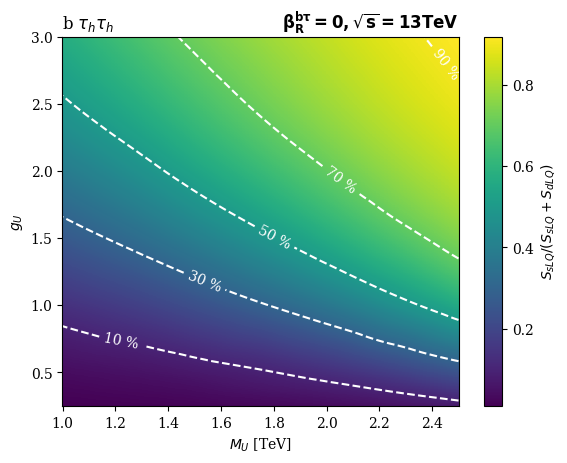

In [20]:
fig, ax = mapas_de_calor.heatmap(Data = mapas_de_calor.suavizar(Compositions['Betard33_0']['b_tau_tau_hadronic']),
                       curvas_de_nivel = {0.1: '10 %', 0.3: '30 %', 0.5: '50 %', 0.7: '70 %', 0.9: '90 %'},
                       curves_labels_locations=[(1.200,0.5), (1.500,1), (1.8, 1.5), (2, 1.8),(2.25,2.5)],
                       titulos = {'titulo': '', 'titulo_izquierda': r'b $\tau_{h} \tau_{h}$', 'titulo_derecha': r'$\mathbf{ \beta_{R}^{b \tau} = 0, \sqrt{s} = 13 TeV}$', 'x_label': r'$M_{U}$ [TeV]', 'y_label': r'$g_U$', 'cbar_label': r'$S_{sLQ}/(S_{sLQ}+S_{dLQ})$'}
                       )

plt.savefig(f'{Path_delphes_preselection}/Composition_Charts/Betard33_0/comp_b_tau_tau_hadronic_woRHC.png', dpi = 300, bbox_inches='tight')

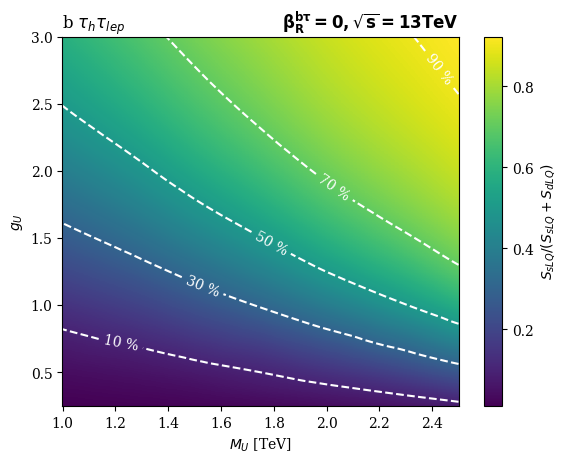

In [21]:
fig, ax = mapas_de_calor.heatmap(Data = mapas_de_calor.suavizar(Compositions['Betard33_0']['b_tau_tau_semileptonic']),
                       curvas_de_nivel = {0.1: '10 %', 0.3: '30 %', 0.5: '50 %', 0.7: '70 %', 0.9: '90 %'},
                       curves_labels_locations=[(1.200,0.5), (1.500,1), (1.8, 1.5), (2, 1.8),(2.25,2.5)],
                       titulos = {'titulo': '', 'titulo_izquierda': r'b $\tau_{h} \tau_{lep}$', 'titulo_derecha': r'$\mathbf{ \beta_{R}^{b \tau} = 0, \sqrt{s} = 13 TeV}$', 'x_label': r'$M_{U}$ [TeV]', 'y_label': r'$g_U$', 'cbar_label': r'$S_{sLQ}/(S_{sLQ}+S_{dLQ})$'}
                       )
plt.savefig(f'{Path_delphes_preselection}/Composition_Charts/Betard33_0/comp_b_tau_tau_semileptonic_woRHC.png', dpi = 300, bbox_inches='tight')

In [22]:
!rm -rf Analisis_mapas_de_calor/